# 분류 모델

## Logistic Regression

#### 문제 정의 : 생선 어종 분류 모델

* Species : 어종
* Weight : 무게
* Length : 길이
* Diagonal : 두께
* Height : 높이
* Width : 대각선 길이

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option( 'display.max_columns', 20 )

import warnings
warnings.filterwarnings( 'ignore' )

### 데이터 준비

In [3]:
fish = pd.read_csv( '../data/fish.csv' )
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


### 데이터 탐색

In [5]:
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
fish[ 'Species' ].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
fish[ 'Species' ].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:>

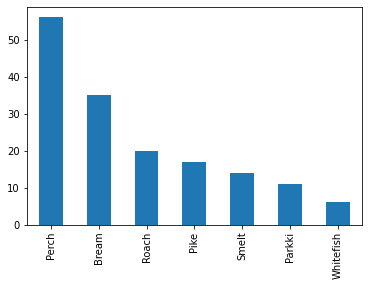

In [9]:
fish[ 'Species' ].value_counts().plot( kind = 'bar' )

### 분류 모델 생성

#### 입력 데이터와 정답 데이터 분리

In [10]:
X = fish[ [ 'Weight', 'Length', 'Diagonal', 'Height', 'Width' ] ].to_numpy()
y = fish[ 'Species' ].to_numpy()

In [11]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (159, 5)
y shape : (159,)


#### 훈련 데이터와 테스트 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 1234 
)

In [15]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (127, 5)
y_train shape : (127,)

X_test shape : (32, 5)
y_test shape : (32,)


#### 데이터 표준화

In [16]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()

ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

In [22]:
print( f'X_train_scaled = {X_train_scaled[:5, :]}' )

X_train_scaled = [[-0.6872458  -0.79156968 -0.7675176  -0.01304324 -0.67031415]
 [-0.60489743 -0.32996003 -0.41802358 -0.59239607 -0.43701955]
 [-1.07236169 -1.62246705 -1.65403901 -1.59450904 -1.81248436]
 [ 1.92045267  1.33183471  1.20158286  0.84175782  1.79202761]
 [-1.06549933 -1.43782319 -1.50060262 -1.57538069 -1.8866466 ]]


In [23]:
print( f'X_test_scaled = {X_train_scaled[:5, :]}' )

X_test_scaled = [[-0.6872458  -0.79156968 -0.7675176  -0.01304324 -0.67031415]
 [-0.60489743 -0.32996003 -0.41802358 -0.59239607 -0.43701955]
 [-1.07236169 -1.62246705 -1.65403901 -1.59450904 -1.81248436]
 [ 1.92045267  1.33183471  1.20158286  0.84175782  1.79202761]
 [-1.06549933 -1.43782319 -1.50060262 -1.57538069 -1.8866466 ]]


#### 분류 모델 생성

* K-NN이용한 분류 모델 생성 - 다중 클래스 모델

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kn = KNeighborsClassifier( n_neighbors = 3 ) # 최근접 이웃 개수가 3인 모델 생성

kn.fit( X_train_scaled, y_train )

KNeighborsClassifier(n_neighbors=3)

In [30]:
print( f'생선 어종 분류 모델( KNN ) 훈련 데이터에 대한 정확도 : \
{kn.score( X_train_scaled, y_train ) }' )
print( f'생선 어종 분류 모델( KNN ) 테스트 데이터에 대한 정확도 : \
{kn.score( X_test_scaled, y_test ) }' )

생선 어종 분류 모델( KNN ) 훈련 데이터에 대한 정확도 : 0.9133858267716536
생선 어종 분류 모델( KNN ) 테스트 데이터에 대한 정확도 : 0.75


In [31]:
# KNN에 의해서 생성된 분류 모델의 클래스 목록
print( kn.classes_ )

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [33]:
# KNN에 의해서 생성된 분류 모델로 테스트 데이터 예측 수행
print( kn.predict( X_test_scaled ) )

['Perch' 'Bream' 'Roach' 'Pike' 'Smelt' 'Perch' 'Smelt' 'Smelt' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Parkki' 'Perch' 'Parkki' 'Perch' 'Bream'
 'Smelt' 'Pike' 'Bream' 'Perch' 'Perch' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Smelt' 'Bream' 'Pike' 'Roach']


Text(0, 0.5, 'Weight')

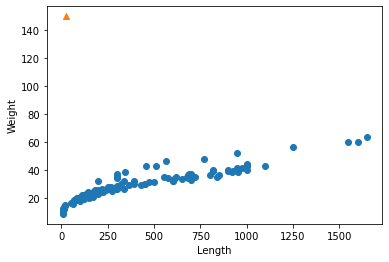

In [36]:
plt.scatter( X_train[ :, 0 ], X_train[ :, 1 ] )
plt.scatter( 25, 150, marker = '^' )
plt.xlabel( 'Length' )
plt.ylabel( 'Weight' )

In [37]:
# 예측값에 대한 확률
proba = kn.predict_proba( X_test_scaled )
print( np.round( proba, decimals = 4 ) )

[[0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.     0.6667 0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.6667 0.     0.     0.3333 0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.3333 0.3333 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.     0.6667 0.    ]
 [0.     0. 

* Logistic Regressiong 이용한 분류 모델 생성 - 이진 분류 모델

#### 데이터 분리

In [40]:
df = fish[ ( fish[ 'Species' ] == 'Bream' ) | ( fish[ 'Species' ] == 'Smelt' ) ]
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [43]:
df[ 'Species' ].unique()

array(['Bream', 'Smelt'], dtype=object)

In [45]:
X = df.drop( [ 'Species' ], axis = 1 ).to_numpy()
y = df[ 'Species' ].to_numpy()

In [46]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (49, 5)
y shape : (49,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1234
)

In [48]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (39, 5)
y_train shape : (39,)

X_test shape : (10, 5)
y_test shape : (10,)


In [49]:
ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

#### Logistic Regression을 이용한 이진 분류 모델 생성

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
# Logistic Regression 모델 생성
lr = LogisticRegression()

lr.fit( X_train_scaled, y_train )

LogisticRegression()

In [56]:
print( f'생선 어종 분류 모델( Logistic Regression ) 훈련 데이터에 대한 정확도 : \
{lr.score( X_train_scaled, y_train ) }' )
print( f'생선 어종 분류 모델( Logistic Regression ) 테스트 데이터에 대한 정확도 : \
{lr.score( X_test_scaled, y_test ) }' )

생선 어종 분류 모델( Logistic Regression ) 훈련 데이터에 대한 정확도 : 1.0
생선 어종 분류 모델( Logistic Regression ) 테스트 데이터에 대한 정확도 : 1.0


In [57]:
print( lr.predict( X_test_scaled ) )

['Bream' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream']


In [63]:
print( lr.classes_ )

['Bream' 'Smelt']


In [64]:
print( lr.predict_proba( X_test_scaled ) )

[[9.78365278e-01 2.16347216e-02]
 [9.59328561e-02 9.04067144e-01]
 [9.90569548e-01 9.43045155e-03]
 [4.23481000e-02 9.57651900e-01]
 [9.99329720e-01 6.70280023e-04]
 [4.80335625e-02 9.51966438e-01]
 [9.71190325e-01 2.88096752e-02]
 [9.99239756e-01 7.60244313e-04]
 [9.81961235e-01 1.80387649e-02]
 [9.93078820e-01 6.92118004e-03]]


### Logistic Regression을 이용한 다중 클래스 분류 모델 생성

#### 데이터 분리

In [74]:
X = fish.drop( [ 'Species' ], axis = 1 )
y = fish[ 'Species' ]

In [75]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (159, 5)
y shape : (159,)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1234
)

In [77]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (127, 5)
y_train shape : (127,)

X_test shape : (32, 5)
y_test shape : (32,)


In [71]:
#X_train, X_train_val, y_train, y_train_val = train_test_split(
#   X_train, y_train, test_size = 0.2, random_state = 42
#)

In [72]:
#print( f'X_train shape : {X_train.shape}' )
#print( f'y_train shape : {y_train.shape}' )
#print( f'\nX_train_val shape : {X_train_val.shape}' )
#print( f'y_train_val shape : {y_train_val.shape}' )

X_train shape : (101, 5)
y_train shape : (101,)

X_train_val shape : (26, 5)
y_train_val shape : (26,)


In [78]:
ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

#### Logistic Regression 모델 생성

In [79]:
lr = LogisticRegression()

lr.fit( X_train_scaled, y_train )

LogisticRegression()

In [80]:
print( f'생선 어종 분류 모델( Logistic Regression ) 훈련 데이터에 대한 정확도 : \
{lr.score( X_train_scaled, y_train ) }' )
print( f'생선 어종 분류 모델( Logistic Regression ) 테스트 데이터에 대한 정확도 : \
{lr.score( X_test_scaled, y_test ) }' )

생선 어종 분류 모델( Logistic Regression ) 훈련 데이터에 대한 정확도 : 0.8188976377952756
생선 어종 분류 모델( Logistic Regression ) 테스트 데이터에 대한 정확도 : 0.8125


In [81]:
print( lr.predict( X_test_scaled ) )

['Perch' 'Bream' 'Perch' 'Pike' 'Smelt' 'Perch' 'Perch' 'Smelt' 'Perch'
 'Bream' 'Bream' 'Perch' 'Perch' 'Parkki' 'Perch' 'Parkki' 'Perch' 'Bream'
 'Smelt' 'Pike' 'Bream' 'Perch' 'Perch' 'Roach' 'Perch' 'Bream' 'Perch'
 'Perch' 'Smelt' 'Bream' 'Pike' 'Perch']


In [89]:
print( lr.predict_proba( X_test_scaled )[ :5, ] )

[[4.09864353e-03 2.91011941e-02 6.88082530e-01 2.57520672e-02
  2.14447779e-01 1.97596881e-02 1.87580973e-02]
 [9.67025263e-01 8.57476532e-03 3.97851434e-03 2.29702037e-03
  3.68321128e-03 2.83600908e-07 1.44409426e-02]
 [7.04532853e-02 4.62163121e-02 5.61840319e-01 4.24761401e-02
  2.20948458e-01 1.16006409e-03 5.69054216e-02]
 [1.79600511e-02 2.38831442e-03 2.14908414e-01 6.43889687e-01
  7.86010182e-02 2.15121237e-04 4.20373937e-02]
 [7.67006879e-04 9.19921650e-02 2.69695501e-01 3.26332114e-03
  1.27407123e-01 5.01686958e-01 5.18792488e-03]]


In [87]:
print( lr.classes_ )

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [88]:
print( lr.coef_.shape, lr.intercept_.shape )

(7, 5) (7,)


In [102]:
# Logistic Regression 하이퍼파라리터
#   C : 규제를 제어하는 하이퍼파라미터, L2 규제, 기본값은 1, 작을수록 규제가 커진다.
#   max_iter : 반복 회수, 기본값은 100
lr = LogisticRegression( C = 500, max_iter = 1000 )

lr.fit( X_train_scaled, y_train )

LogisticRegression(C=500, max_iter=1000)

In [103]:
print( f'생선 어종 분류 모델( Logistic Regression ) 훈련 데이터에 대한 정확도 : \
{lr.score( X_train_scaled, y_train ) }' )
print( f'생선 어종 분류 모델( Logistic Regression ) 테스트 데이터에 대한 정확도 : \
{lr.score( X_test_scaled, y_test ) }' )

생선 어종 분류 모델( Logistic Regression ) 훈련 데이터에 대한 정확도 : 0.9921259842519685
생선 어종 분류 모델( Logistic Regression ) 테스트 데이터에 대한 정확도 : 0.875


In [109]:
c_list = [ 1, 5, 6, 7, 8, 9, 20, 50, 100, 200, 300 ]

for c in c_list:
    lr = LogisticRegression( C = c, max_iter = 1000 )
    lr.fit( X_train_scaled, y_train )
    
    print( f'C - {c:5}인경우 훈련 데이터에 대한 정확도 :  {c} \
    {lr.score( X_train_scaled, y_train ) }' )
    print( f'C - {c:5}인경우 테스트 데이터에 대한 정확도 : {c} \
    {lr.score( X_test_scaled, y_test ) }\n' )

C -     1인경우 훈련 데이터에 대한 정확도 :  1     0.8188976377952756
C -     1인경우 테스트 데이터에 대한 정확도 : 1     0.8125

C -     5인경우 훈련 데이터에 대한 정확도 :  5     0.8740157480314961
C -     5인경우 테스트 데이터에 대한 정확도 : 5     0.84375

C -     6인경우 훈련 데이터에 대한 정확도 :  6     0.889763779527559
C -     6인경우 테스트 데이터에 대한 정확도 : 6     0.84375

C -     7인경우 훈련 데이터에 대한 정확도 :  7     0.8976377952755905
C -     7인경우 테스트 데이터에 대한 정확도 : 7     0.84375

C -     8인경우 훈련 데이터에 대한 정확도 :  8     0.8976377952755905
C -     8인경우 테스트 데이터에 대한 정확도 : 8     0.8125

C -     9인경우 훈련 데이터에 대한 정확도 :  9     0.905511811023622
C -     9인경우 테스트 데이터에 대한 정확도 : 9     0.8125

C -    20인경우 훈련 데이터에 대한 정확도 :  20     0.9448818897637795
C -    20인경우 테스트 데이터에 대한 정확도 : 20     0.78125

C -    50인경우 훈련 데이터에 대한 정확도 :  50     0.952755905511811
C -    50인경우 테스트 데이터에 대한 정확도 : 50     0.84375

C -   100인경우 훈련 데이터에 대한 정확도 :  100     0.984251968503937
C -   100인경우 테스트 데이터에 대한 정확도 : 100     0.84375

C -   200인경우 훈련 데이터에 대한 정확도 :  200     0.984251968503937
C -   200인경우 테스트 데이터에 대한

### 의사 결정 트리( Decision Tree ) 이용 분류 모델

* 와인 종류 분류 모델( white/red 와인 분류 )

In [110]:
wine = pd.read_csv( '../data/wine.csv' )

In [111]:
wine.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [112]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [113]:
wine[ 'type' ].unique()

array(['white', 'red'], dtype=object)

#### 데이터 전처리

In [114]:
df = wine.copy()

In [115]:
# 이진 분류 - 양성 클래스/음성 클래스로 분류
# 양성 클래스가 주 분류 목적
df[ 'type' ] = df[ 'type' ].map( { 'white': 0, 'red': 1 } ).astype( int )
df[ 'type' ].unique()

array([0, 1])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 601.4 KB


#### 데이터 분리

In [125]:
X = df.drop( [ 'index', 'quality', 'type' ], axis = 1 )
y = df[ 'type' ]

In [126]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (5497, 11)
y shape : (5497,)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [128]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (4397, 11)
y_train shape : (4397,)

X_test shape : (1100, 11)
y_test shape : (1100,)


#### feature scaling - StandardScaler

In [129]:
ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

#### 분류 모델 생성 - Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt = DecisionTreeClassifier( random_state = 42 )
dt.fit( X_train_scaled, y_train )

DecisionTreeClassifier(random_state=42)

In [133]:
print( f'와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : \
{dt.score( X_train_scaled, y_train ) }' )
print( f'와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : \
{dt.score( X_test_scaled, y_test ) }' )

와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : 0.9997725722083238
와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : 0.9827272727272728


In [134]:
from sklearn.tree import plot_tree

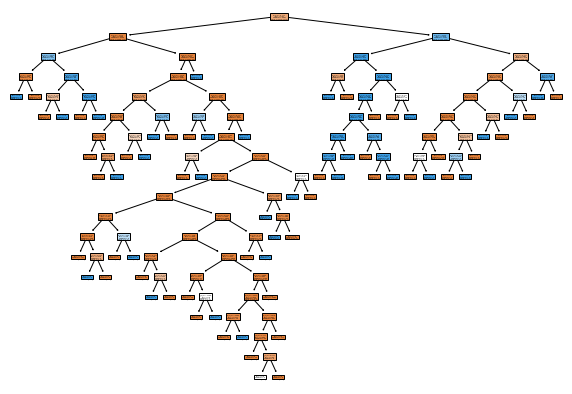

In [137]:
plt.figure( figsize = ( 10, 7 ) )
plot_tree( dt, filled = True )
plt.show()

In [139]:
wine.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

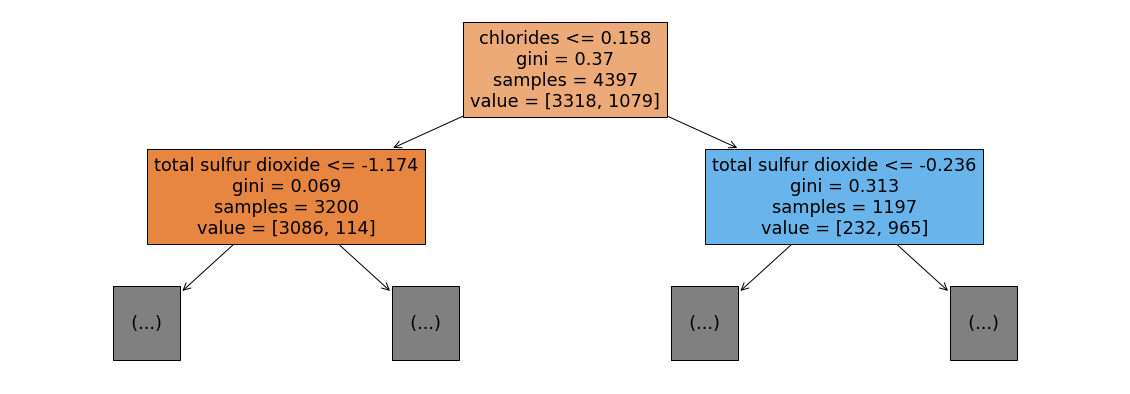

In [144]:
plt.figure( figsize = ( 20, 7 ) )
plot_tree( dt, max_depth = 1, filled = True,
           feature_names = [ 'fixed acidity', 'volatile acidity', 
                             'citric acid', 'residual sugar', 
                             'chlorides', 'free sulfur dioxide',
                             'total sulfur dioxide', 'density', 
                             'pH', 'sulphates', 'alcohol' ] )
plt.show()

* 가지치기를 통한 의사 결정 트리 모델 생성 

In [153]:
dt = DecisionTreeClassifier( max_depth = 3, random_state = 42 )
dt.fit( X_train_scaled, y_train )

DecisionTreeClassifier(max_depth=3, random_state=42)

In [154]:
print( f'와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : \
{dt.score( X_train_scaled, y_train ) }' )
print( f'와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : \
{dt.score( X_test_scaled, y_test ) }' )

와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : 0.9822606322492609
와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : 0.9754545454545455


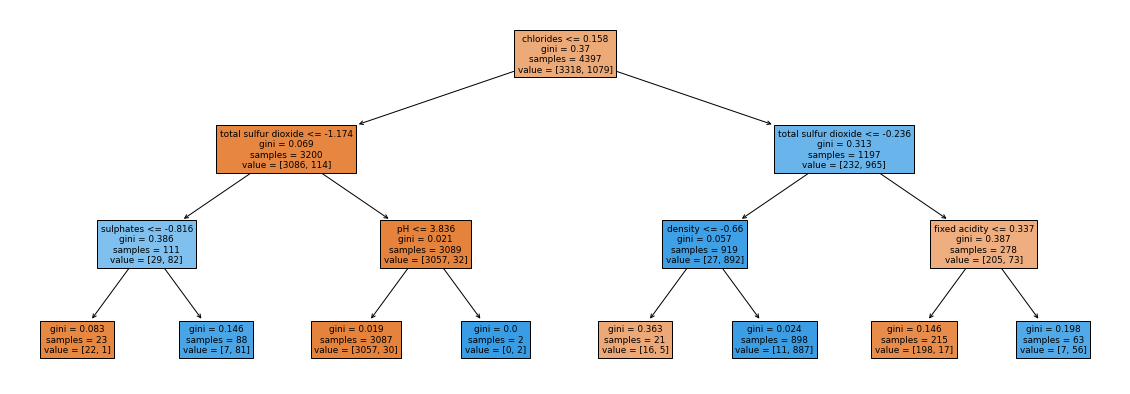

In [155]:
plt.figure( figsize = ( 20, 7 ) )
plot_tree( dt, filled = True,
           feature_names = [ 'fixed acidity', 'volatile acidity', 
                             'citric acid', 'residual sugar', 
                             'chlorides', 'free sulfur dioxide',
                             'total sulfur dioxide', 'density', 
                             'pH', 'sulphates', 'alcohol' ])
plt.show()

* 표준화를 적용하지 않는 특성을 이용한 의사 결정 트리 모델 생성

In [160]:
dt = DecisionTreeClassifier( max_depth = 3, random_state = 42 )
dt.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3, random_state=42)

In [161]:
print( f'와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : \
{dt.score( X_train, y_train ) }' )
print( f'와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : \
{dt.score( X_test, y_test ) }' )

와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : 0.9822606322492609
와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : 0.9754545454545455


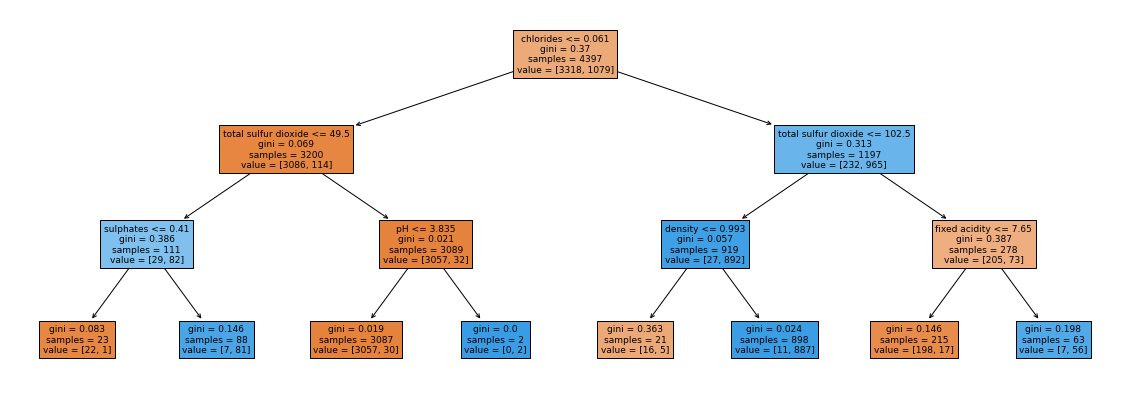

In [162]:
plt.figure( figsize = ( 20, 7 ) )
plot_tree( dt, filled = True,
           feature_names = [ 'fixed acidity', 'volatile acidity', 
                             'citric acid', 'residual sugar', 
                             'chlorides', 'free sulfur dioxide',
                             'total sulfur dioxide', 'density', 
                             'pH', 'sulphates', 'alcohol' ])
plt.show()

* 특성 중요도

In [163]:
wine.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [165]:
print( f'와인 분류 모델 의사 결정 트리 모델 특성 중요도 : {dt.feature_importances_}' )

와인 분류 모델 의사 결정 트리 모델 특성 중요도 : [0.04314704 0.         0.         0.         0.69845448 0.
 0.22124309 0.01557199 0.00264671 0.01893669 0.        ]


* 특성 중요도에 따른 특성만으로 의사 결정 트리 생성

In [166]:
X = wine[ [ 'fixed acidity', 'chlorides', 
            'total sulfur dioxide', 'density', 
            'pH', 'sulphates' ] ]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42 
)

In [172]:
dt = DecisionTreeClassifier( max_depth = 3, random_state = 42 )
dt.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=3, random_state=42)

In [173]:
print( f'와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : \
{dt.score( X_train, y_train ) }' )
print( f'와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : \
{dt.score( X_test, y_test ) }' )

와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : 0.9822606322492609
와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : 0.9754545454545455


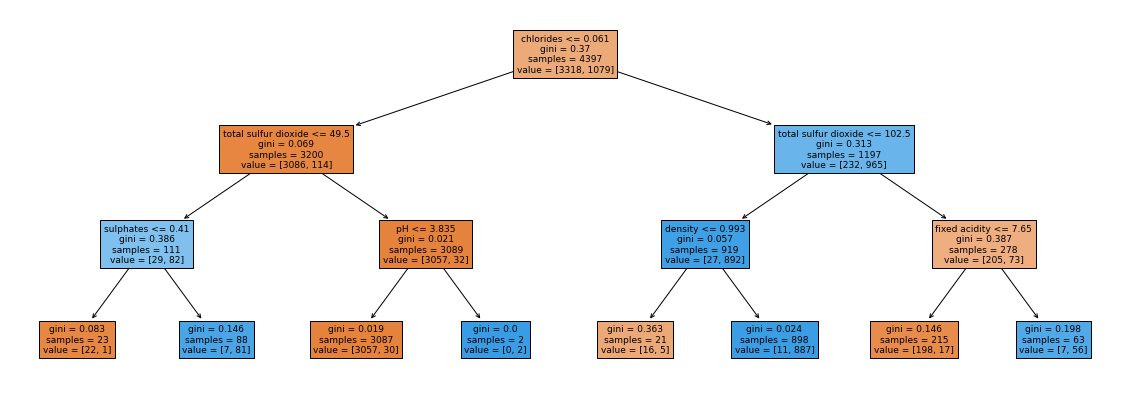

In [174]:
plt.figure( figsize = ( 20, 7 ) )
plot_tree( dt, filled = True,
           feature_names = [ 'fixed acidity', 'chlorides', 
                             'total sulfur dioxide', 'density', 
                             'pH', 'sulphates' ])
plt.show()

In [175]:
print( f'와인 분류 모델 의사 결정 트리 모델 특성 중요도 : {dt.feature_importances_}' )

와인 분류 모델 의사 결정 트리 모델 특성 중요도 : [0.04314704 0.69845448 0.22124309 0.01557199 0.00264671 0.01893669]


## 교차 검증

### 검증 데이터 세트( validation data set )

In [176]:
print( f'전체 입력 데이터 차원 : {X.shape}' )
print( f'전체 정답 데이터 차원 : {y.shape}' )

전체 입력 데이터 차원 : (5497, 6)
전체 정답 데이터 차원 : (5497,)


In [177]:
print( f'전체 훈련 데이터 차원( 입력 ) : {X_train.shape}' )
print( f'전체 훈련 데이터 차원( 정답 ) : {y_train.shape}' )

전체 훈련 데이터 차원( 입력 ) : (4397, 6)
전체 훈련 데이터 차원( 정답 ) : (4397,)


In [178]:
print( f'전체 테스트 데이터 차원( 입력 ) : {X_test.shape}' )
print( f'전체 테스트 데이터 차원( 정답 ) : {y_test.shape}' )

전체 테스트 데이터 차원( 입력 ) : (1100, 6)
전체 테스트 데이터 차원( 정답 ) : (1100,)


In [179]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.2, random_state = 42
)

In [180]:
print( f'훈련 데이터 차원( 입력 ) : {X_train.shape}' )
print( f'훈련 데이터 차원( 정답 ) : {y_train.shape}' )

훈련 데이터 차원( 입력 ) : (3517, 6)
훈련 데이터 차원( 정답 ) : (3517,)


In [181]:
print( f'검증 데이터 차원( 입력 ) : {X_val.shape}' )
print( f'검증 데이터 차원( 정답 ) : {y_val.shape}' )

검증 데이터 차원( 입력 ) : (880, 6)
검증 데이터 차원( 정답 ) : (880,)


In [183]:
dt = DecisionTreeClassifier( random_state = 42 )
dt.fit( X_train, y_train )

DecisionTreeClassifier(random_state=42)

In [184]:
print( f'와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : \
{dt.score( X_train, y_train ) }' )
print( f'와인 종류 분류 모델( Decision Tree ) 검증 데이터에 대한 정확도 : \
{dt.score( X_val, y_val ) }' )

와인 종류 분류 모델( Decision Tree ) 훈련 데이터에 대한 정확도 : 0.9997156667614444
와인 종류 분류 모델( Decision Tree ) 테스트 데이터에 대한 정확도 : 0.9875


#### 교차 검증( 5-fold 교차 검증 )

In [186]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [187]:
from sklearn.model_selection import cross_validate

In [188]:
scores = cross_validate( dt, X_train, y_train )

In [190]:
print( f'교차 검증 결과 항목 : {scores.keys()}' )
print( f'\n교차 검증 결과 :\n{scores}' )

교차 검증 결과 항목 : dict_keys(['fit_time', 'score_time', 'test_score'])

교차 검증 결과 :
{'fit_time': array([0.02221513, 0.0184021 , 0.011976  , 0.01122689, 0.0160079 ]), 'score_time': array([0.00284076, 0.00197196, 0.00204015, 0.00283599, 0.00195026]), 'test_score': array([0.98181818, 0.98409091, 0.98065984, 0.98634812, 0.97724687])}


In [193]:
print( f'교차 검증 결과 평균 : {np.mean( scores[ "test_score" ] )}' )

교차 검증 결과 평균 : 0.9820327851897819


In [194]:
from sklearn.model_selection import StratifiedKFold # 분활기( splitter )

In [196]:
scores = cross_validate( dt, X_train, y_train,
                         cv = StratifiedKFold() )

In [197]:
print( f'교차 검증 결과 평균 : {np.mean( scores[ "test_score" ] )}' )

교차 검증 결과 평균 : 0.9820327851897819


In [199]:
# 10-fold 교차 검증
splitter = StratifiedKFold( n_splits = 10, shuffle = True, random_state = 42 )
scores = cross_validate( dt, X_train, y_train,
                         cv = splitter )

In [200]:
print( f'교차 검증 결과 평균 : {np.mean( scores[ "test_score" ] )}' )

교차 검증 결과 평균 : 0.9833997722095674


In [201]:
# 20-fold 교차 검증
splitter = StratifiedKFold( n_splits = 20, shuffle = True, random_state = 42 )
scores = cross_validate( dt, X_train, y_train,
                         cv = splitter )

In [202]:
print( f'교차 검증 결과 평균 : {np.mean( scores[ "test_score" ] )}' )

교차 검증 결과 평균 : 0.9852210460772103


In [203]:
# 30-fold 교차 검증
splitter = StratifiedKFold( n_splits = 30, shuffle = True, random_state = 42 )
scores = cross_validate( dt, X_train, y_train,
                         cv = splitter )

In [204]:
print( f'교차 검증 결과 평균 : {np.mean( scores[ "test_score" ] )}' )

교차 검증 결과 평균 : 0.9859037678998541


### 분류 모델 평가

In [205]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [215]:
pred = dt.predict( X_test )

In [220]:
confusion = confusion_matrix( y_test, pred )
accuracy = accuracy_score( y_test, pred )
precision = precision_score( y_test, pred )
recall = recall_score( y_test, pred )
f1 = f1_score( y_test, pred )

In [221]:
print( f'혼동 행렬 :\n{confusion}' )
print( f'\n정확도 : {accuracy}' )
print( f'\n정밀도 : {precision}' )
print( f'\n재현율 : {recall}' )
print( f'\nF1 score : {f1}' )

혼동 행렬 :
[[832   9]
 [ 10 249]]

정확도 : 0.9827272727272728

정밀도 : 0.9651162790697675

재현율 : 0.9613899613899614

F1 score : 0.9632495164410058
